In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

***

# TweetsCov19

***

In [2]:
#Labels und Pfad 
TweetsCov19_labels = ['Tweet_Id', "Benutzername", 'Zeitstempel', 'Abonnenten', 'Abonnierten', 'Retweets', 'Likes', 'Entities', 'Stimmung', 'Erwähnungen', 'Hashtags', 'URLs', 'Text', 'Ist_gelöscht', 'Anzahl der Erwähnungen', 'Anzahl der Hashtags', 'Anzahl der URLs', 'Domäne', 'Textlänge', 'Lesbarkeit','Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_com', 'Emojis', 'Anzahl der Emojis',  'Emoji_neg', 'Emoji_neu', 'Emoji_pos', 'Emoji_Mittelwert', 'Emoji_bearbeiteten']
TweetsCov19_Pfad =  '../Data/Dataframes/TweetsCov19_stichprobe_final.tsv'

In [3]:
#Stichprobe von Tweetscov19-Stichprobe lesen

df_tweetscov19 = pd.read_csv(TweetsCov19_Pfad, sep='\t', error_bad_lines=False, names=TweetsCov19_labels)
print('Form:', df_tweetscov19.shape)
df_tweetscov19.head()

Form: (9409841, 31)


,Tweet_Id,Benutzername,Zeitstempel,Abonnenten,Abonnierten,Retweets,Likes,Entities,Stimmung,Erwähnungen,Hashtags,URLs,Text,Ist_gelöscht,Anzahl der Erwähnungen,Anzahl der Hashtags,Anzahl der URLs,Domäne,Textlänge,Lesbarkeit,Vader_neg,Vader_neu,Vader_pos,Vader_com,Emojis,Anzahl der Emojis,Emoji_neg,Emoji_neu,Emoji_pos,Emoji_Mittelwert,Emoji_bearbeiteten
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,2019-09-30 22:00:01+00:00,764191,132,19,180,foodie:Foodie:-2.096663959988218;,1 -1,null;,HalloweenTime?,null;,Has your appetite materialized just as fast as...,True,0,1,0,0,155,76.5530,-0.0000,1.0000,0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
1,1178791641601232896,627f7d4ef584ba33a676a4ebcb861cdb,2019-09-30 22:00:02+00:00,321189,26833,32,43,mainland china:Mainland_China:-1.6252666161640...,1 -1,null;,HongKong,https://www.catholicnewsagency.com/news/amid-h...,The persecution of Catholics in mainland China...,False,0,1,1,catholicnewsagency.com,204,29.4680,-0.0000,0.9190,0.0810,0.3182,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
2,1178791643509612547,7966d5716c1c4f33591b17755184e3d6,2019-09-30 22:00:03+00:00,14209,10623,90,182,brexit:Brexit:-1.582809637810362;hear hear:Hea...,1 -2,null;,Brexit,null;,"Hear, hear..\nEmily: You were an outspoken cri...",False,0,1,0,0,163,79.5340,-0.2020,0.7980,0.0000,-0.6486,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
3,1178791644214235137,f17996c036ed4cd981f5448fe00d9ed2,2019-09-30 22:00:03+00:00,2264986,655,60,528,null;,3 -1,amstandardca.,BlueJays,null;,We wrapped up the season with a WINNING week! ...,False,1,1,0,0,132,85.8890,-0.0000,0.6240,0.3760,0.8633,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
4,1178791645371875329,32a54e5f6d8a67de1bffd2e689594dc8,2019-09-30 22:00:03+00:00,171,138,33,117,my family:My_Family:-2.6353832182503094;roll t...,4 -1,null;,null;,null;,Super excited to announce that I will be spend...,False,0,0,0,0,257,61.2030,-0.0000,0.7650,0.2350,0.9117,"['🐘', '🔴']",2,-0.0150,0.2650,0.2200,0.2235,2.0000


In [8]:
#Gelöschte und nicht gelöshte Tweets voneinander trennen.
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['Ist_gelöscht'] == True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['Ist_gelöscht'] == False]

In [6]:
#Die drei Wertungen für die Stimmung, also negativ, positiv und Mittelwert von den gelöschten Tweets mit den nicht gelöschten Tweets vergleichen. 
def Stimmung_analyse_negativ_positiv_Mittelwert(covid19tweets_del, covid19tweets_undel, titel):
    df_del = covid19tweets_del
    df_undel = covid19tweets_undel

    df_del = df_del.reset_index()
    df_undel = df_undel.reset_index()

    df_del['Vader_neg']= df_del['Vader_neg'].astype(float) 
    df_undel['Vader_neg']= df_undel['Vader_neg'].astype(float) 
    
    df_del['Vader_com']= df_del['Vader_com'].astype(float) 
    df_undel['Vader_com']= df_undel['Vader_com'].astype(float) 

    df_del['Vader_pos']= df_del['Vader_pos'].astype(float) 
    df_undel['Vader_pos']= df_undel['Vader_pos'].astype(float) 
    
    df_del.Zeitstempel = pd.to_datetime(df_del.Zeitstempel)
    df_del.sort_values(by = ['Zeitstempel'], inplace=True, ascending = True)
    df_del.index = df_del.Zeitstempel
 
    print('Number of tweets: ', df_del['Tweet_Id'].size)
    g = df_del.groupby(pd.DatetimeIndex(df_del['Zeitstempel']).normalize())
    df_del  = g.mean()
    
     
    
    df_undel.Zeitstempel = pd.to_datetime(df_undel.Zeitstempel)
    df_undel.sort_values(by = ['Zeitstempel'], inplace=True, ascending = True)
    df_undel.index = df_undel.Zeitstempel

    print('Number of tweets: ', df_undel['Tweet_Id'].size)

    g = df_undel.groupby(pd.DatetimeIndex(df_undel['Zeitstempel']).normalize())
    df_undel  = g.mean()
    
    df_del.rename(columns = {'Vader_neg' : 'Gelöschte Tweets(negativ)'}, inplace = True)
    df_del.rename(columns = {'Vader_pos' : 'Gelöschte Tweets(positiv)'}, inplace = True)
    df_del.rename(columns = {'Vader_com' : 'Gelöschte Tweets(Mittelwert)'}, inplace = True)

    df_undel.rename(columns = {'Vader_neg' : 'Nicht gelöschte Tweets(negativ)'}, inplace = True)
    df_undel.rename(columns = {'Vader_pos' : 'Nicht gelöschte Tweets(positiv)'}, inplace = True)
    df_undel.rename(columns = {'Vader_com' : 'Nicht gelöschte Tweets(Mittelwert)'}, inplace = True)

    
    ax = df_del.plot(y=['Gelöschte Tweets(negativ)'], figsize=(15,6), color = 'crimson')
    df_del.plot(y=['Gelöschte Tweets(positiv)'], color = 'darkgreen', ax = ax)
    df_del.plot(y=['Gelöschte Tweets(Mittelwert)'], color = 'mediumblue', ax = ax)

    df_undel.plot(y=['Nicht gelöschte Tweets(negativ)'],style = '--' , color = 'crimson', ax = ax)
    df_undel.plot(y=['Nicht gelöschte Tweets(positiv)'],style = '--' , color = 'darkgreen', ax = ax)
    df_undel.plot(y=['Nicht gelöschte Tweets(Mittelwert)'],style = '--' , color = 'mediumblue', ax = ax)
    
    
    ax.set_xlabel('', fontsize = 19)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    ax.set_ylabel('Stimmung', fontsize = 19)
    plt.gca().legend(loc='lower center', ncol = 2, fontsize=19, bbox_to_anchor=(0.5, -0.4))
    
  
    plt.savefig('.plots_pdfs/Stimmungsanalyse_tweetcov19_vader_2.pdf', bbox_inches = 'tight')
    plt.show()

Number of tweets:  2137501
Number of tweets:  7272340


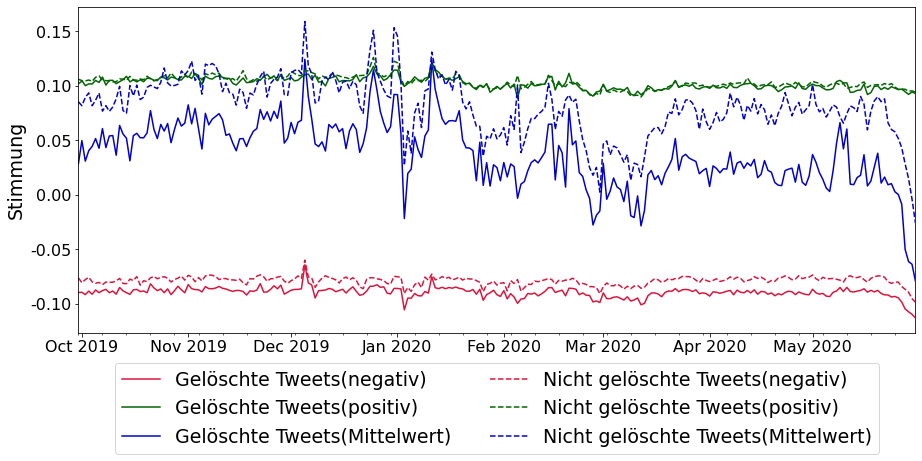

In [14]:
Stimmung_analyse_negativ_positiv_Mittelwert(df_tweetscov19_del, df_tweetscov19_undel, 'Stimmungsanalyse')

In [7]:
#Die drei Wertungen für die Stimmung, also negativ, positiv und Mittelwert von den gelöschten Tweets mit den nicht gelöschten Tweets vergleichen. 
#Englische Labels

def Sentiment_analysis_negativ_positiv_compound(covid19tweets_del, covid19tweets_undel, titel):
    df_del = covid19tweets_del
    df_undel = covid19tweets_undel

    df_del = df_del.reset_index()
    df_undel = df_undel.reset_index()

    df_del['Vader_neg']= df_del['Vader_neg'].astype(float) 
    df_undel['Vader_neg']= df_undel['Vader_neg'].astype(float) 
    
    df_del['Vader_com']= df_del['Vader_com'].astype(float) 
    df_undel['Vader_com']= df_undel['Vader_com'].astype(float) 

    df_del['Vader_pos']= df_del['Vader_pos'].astype(float) 
    df_undel['Vader_pos']= df_undel['Vader_pos'].astype(float) 
    
    df_del.Zeitstempel = pd.to_datetime(df_del.Zeitstempel)
    df_del.sort_values(by = ['Zeitstempel'], inplace=True, ascending = True)
    df_del.index = df_del.Zeitstempel
  
    print('Number of tweets: ', df_del['Tweet_Id'].size)
    g = df_del.groupby(pd.DatetimeIndex(df_del['Zeitstempel']).normalize())
    df_del  = g.mean()
    
     
    
    df_undel.Zeitstempel = pd.to_datetime(df_undel.Zeitstempel)
    df_undel.sort_values(by = ['Zeitstempel'], inplace=True, ascending = True)
    df_undel.index = df_undel.Zeitstempel
    print('Number of tweets: ', df_undel['Tweet_Id'].size)

    g = df_undel.groupby(pd.DatetimeIndex(df_undel['Zeitstempel']).normalize())
    df_undel  = g.mean()
    
    df_del.rename(columns = {'Vader_neg' : 'Deleted Tweets(negative)'}, inplace = True)
    df_del.rename(columns = {'Vader_pos' : 'Deleted Tweets(positive)'}, inplace = True)
    df_del.rename(columns = {'Vader_com' : 'Deleted Tweets(Average)'}, inplace = True)

    df_undel.rename(columns = {'Vader_neg' : 'Non Deleted Tweets(negative)'}, inplace = True)
    df_undel.rename(columns = {'Vader_pos' : 'Non Deleted Tweets(positive)'}, inplace = True)
    df_undel.rename(columns = {'Vader_com' : 'Non Deleted Tweets(Average)'}, inplace = True)

    ax = df_del.plot(y=['Deleted Tweets(negative)'], figsize=(15,6), color = 'crimson')
    df_del.plot(y=['Deleted Tweets(positive)'], color = 'darkgreen', ax = ax)
    df_del.plot(y=['Deleted Tweets(Average)'], color = 'mediumblue', ax = ax)

    df_undel.plot(y=['Non Deleted Tweets(negative)'],style = '--' , color = 'crimson', ax = ax)
    df_undel.plot(y=['Non Deleted Tweets(positive)'],style = '--' , color = 'darkgreen', ax = ax)
    df_undel.plot(y=['Non Deleted Tweets(Average)'],style = '--' , color = 'mediumblue', ax = ax)
    
    ax.set_xlabel('', fontsize = 19)
    ax.xaxis.set_major_locator(mdates.MonthLocator())

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    ax.set_ylabel('Sentiment', fontsize = 19)
    plt.gca().legend(loc='lower center', ncol = 2, fontsize=19, bbox_to_anchor=(0.5, -0.4))
    
    plt.savefig('./plots_pdfs/Stimmungsanalyse_tweetcov19_vader_2.pdf', bbox_inches = 'tight')
    plt.show()

Number of tweets:  2137501
Number of tweets:  7272340


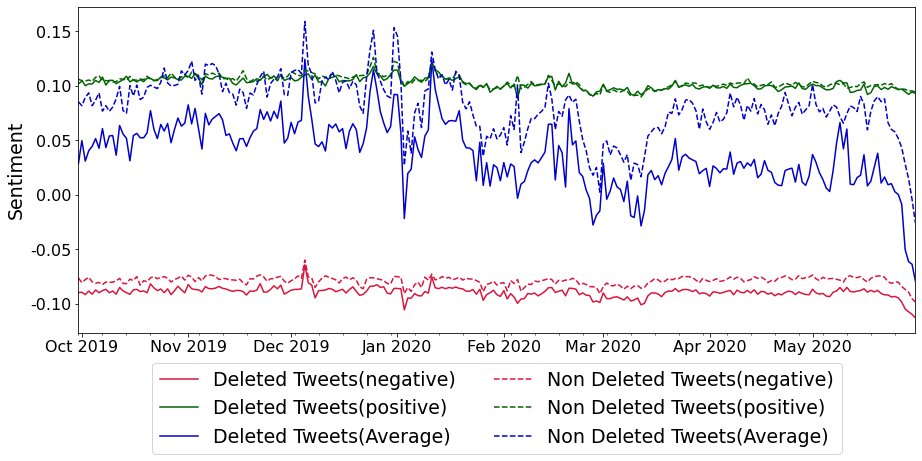

In [18]:
Sentiment_analysis_negativ_positiv_compound(df_tweetscov19_del, df_tweetscov19_undel, 'Stimmungsanalyse')

***

# TweetsKB

***

In [4]:
#Labels und Pfad

TweetsKB_labels    = ['Tweet_Id', 'Benutzername', 'Zeitstempel', 'Abonnenten', 'Abonnierten', 'Retweets', 'Likes', 'Text', 'URLs', 'Ist_gelöscht', 'Hashtags', 'Erwähnungen', 'Anzahl der Hashtags', 'Anzahl der Mentions', 'Textlänge', 'Lesbarkeit', 'Domäne', 'Anzahl der URLs', 'Vader_pos', 'Vader_neu', 'Vader_neg', 'Vader_com' , 'Emojis', 'Anzahl der Emojis','Emoji_neg', 'Emoji_neu', 'Emoji_pos', 'Emoji_Mittelwert', 'Emoji_bearbeiteten']
TweetsKB_Pfad =  '../Data/Dataframes/Tweetskb_stichprobe_final.tsv'

In [5]:
#TweetsKB-Stichprobe wird gelesen

df_tweetskb = pd.read_csv(TweetsKB_Pfad, sep='\t', error_bad_lines=False, names=TweetsKB_labels)
print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (9409841, 29)


,Tweet_Id,Benutzername,Zeitstempel,Abonnenten,Abonnierten,Retweets,Likes,Text,URLs,Ist_gelöscht,Hashtags,Erwähnungen,Anzahl der Hashtags,Anzahl der Mentions,Textlänge,Lesbarkeit,Domäne,Anzahl der URLs,Vader_pos,Vader_neu,Vader_neg,Vader_com,Emojis,Anzahl der Emojis,Emoji_neg,Emoji_neu,Emoji_pos,Emoji_Mittelwert,Emoji_bearbeiteten
0,1178791636039589889,DCComics,2019-09-30 22:00:01+00:00,3349606,563,2,13,"Today on #DCDaily, the crew takes a deep dive ...",http://bit.ly/2mlNYpS:-:,False,['DCDaily'],['DCUTitans'],1,1,192,70.3500,dcuniverseinfinite.com,1,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
1,1178791641265639424,seanberdyz,2019-09-30 22:00:02+00:00,1203,499,4,20,𝘪’𝘮 𝘨𝘰𝘯𝘯𝘢 𝘣𝘦 𝘳𝘪𝘨𝘩𝘵 𝘩𝘦𝘳𝘦 ⟶ https://t.co/kOxWQL5...,http://ourownside.carrd.co:-:,True,[],[],0,0,73,82.3900,carrd.co,1,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
2,1178791640573579264,AnArtistAtBirth,2019-09-30 22:00:02+00:00,109,215,0,0,❛ 𝘠𝘰𝘶'𝘳𝘦 𝘴𝘪𝘵𝘵𝘪𝘯' 𝘰𝘯 𝘺𝘰𝘶𝘳 𝘧𝘦𝘦𝘭𝘪𝘯𝘨𝘴 . . . 𝘐'𝘮 𝘴𝘪...,null;,True,['𝘛𝘩𝘦𝘰𝘯𝘦'],[],1,0,128,123.7550,0,0,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
3,1178791644797255680,lagosboygang,2019-09-30 22:00:03+00:00,571,1401,0,0,@Tiffany_o_ @UG_derrick That's the one i wanna...,null;,True,[],"['Tiffany_o_', 'UG_derrick']",0,2,77,105.9210,0,0,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
4,1178791648056217600,Phenom_Hoops,2019-09-30 22:00:04+00:00,25630,1674,1,1,2022 6’9 Perry Smith Jr. showcasing his high-m...,https://www.phenomhoopreport.com/2022-69-perry...,False,['PhenomHoops'],[],1,0,227,65.9430,phenomhoopreport.com,1,0.0580,0.9420,-0.0000,0.2263,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000


In [11]:
#Gelöschte und nicht gelöshte Tweets voneinander trennen.
df_tweetskb_del = df_tweetskb[df_tweetskb['Ist_gelöscht'] == True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['Ist_gelöscht'] == False]

Number of tweets:  2722577
Number of tweets:  6687264


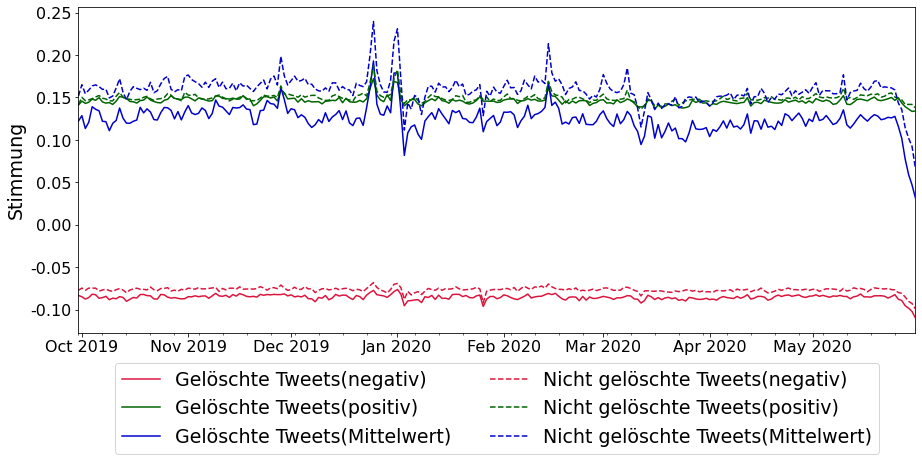

In [12]:
Stimmung_analyse_negativ_positiv_Mittelwert(df_tweetskb_del, df_tweetskb_undel, 'Stimmungsanalyse(Vader)')

Number of tweets:  2722577
Number of tweets:  6687264


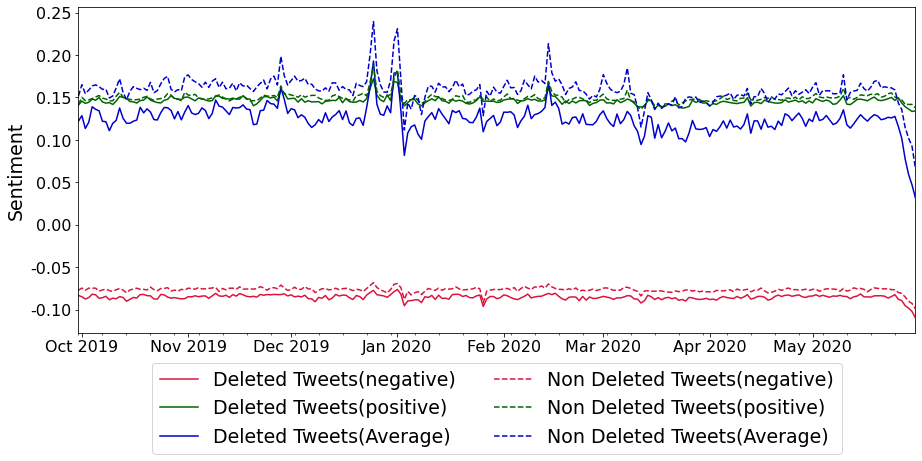

In [14]:
Sentiment_analysis_negativ_positiv_compound(df_tweetskb_del, df_tweetskb_undel, 'Stimmungsanalyse(Vader)')